In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
cd C:\Users\HP\Downloads

C:\Users\HP\Downloads


In [3]:
data = pd.read_csv("Fuel consumption 2019.csv")

In [4]:
data

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2019,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.3,7.5,9.0,211
1042,2019,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,Z,11.3,8.5,10.0,233
1043,2019,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,Z,11.8,8.6,10.4,242
1044,2019,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.3,8.5,10.0,233


In [5]:
data.describe()

,Model-Year,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
count,1046.0,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,2019.0,3.108795,5.595602,12.378011,9.038050,10.872562,251.312620
std,0.0,1.315989,1.796845,3.294286,2.049742,2.697321,57.017573
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,212.250000
50%,2019.0,3.000000,6.000000,12.050000,8.800000,10.600000,248.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.575000,289.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,522.000000


In [6]:
data.count()

Model-Year               1046
Make                     1046
Model                    1046
Vehicle-Class            1046
Engine-Size              1046
Cylinders                1046
Transmission             1046
Fuel-Type                1046
Fuel-Consumption-City    1046
Fuel-Consumption-Hwy     1046
Fuel-Consumption-Comb    1046
CO2-Emissions            1046
dtype: int64

In [7]:
data_new = data[["Engine-Size" , "CO2-Emissions"]]

Text(0, 0.5, 'CO2-Emissions')

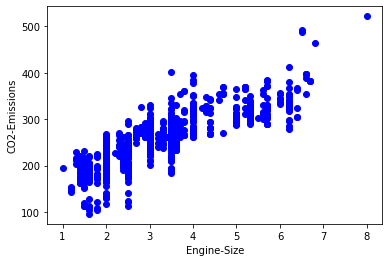

In [8]:
plt.scatter(data_new["Engine-Size"] , data_new["CO2-Emissions"], color="blue")

plt.xlabel("Engine-Size")
plt.ylabel ("CO2-Emissions")

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_new,data_new,train_size=0.8)

In [10]:
regr = linear_model.LinearRegression()
train_x = np.array(X_train[["Engine-Size"]])
train_y = np.array(y_train[["CO2-Emissions"]])
regr.fit(train_x, train_y)

LinearRegression()

In [11]:
print ("B1 : ", regr.coef_)
print ("B0 :" , regr.intercept_)
B0 = regr.intercept_
B1 = regr.coef_

B1 :  [[36.51468284]]
B0 : [137.61997963]


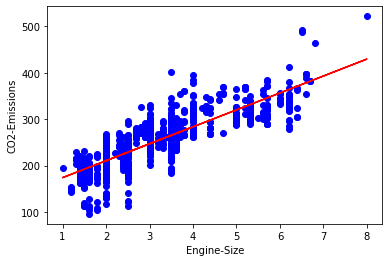

In [12]:
plt.scatter(data_new["Engine-Size"] , data_new["CO2-Emissions"], color="blue")

plt.xlabel("Engine-Size")
plt.ylabel ("CO2-Emissions")
plt.plot(train_x, B0 + B1 * train_x , '-r')

In [13]:
def get_regression_predictions(input_feature, B0 , B1):

    prediction = B0 + B1 * input_feature
    return prediction

In [14]:
enginesize = 3.5

estimated_Co2Emission = get_regression_predictions(enginesize,B0 , B1)
print("Estimated Co2Emisssions : " , estimated_Co2Emission)

Estimated Co2Emisssions :  [[265.42136959]]


In [15]:
test_x = np.array(X_test[["Engine-Size"]])
test_y = np.array(y_test[["CO2-Emissions"]])
test_yy = regr.predict(test_x)

In [16]:
Error = np.mean((test_y - test_yy)**2)

In [17]:
Error

880.3483289171253